<a href="https://colab.research.google.com/github/tracieschroeder/CodingCamp/blob/main/Muon_mass_Fit_using_SciPy_added_by_J_Dolen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating Invariant Mass

This activity uses data from the [CMS detector](https://cms.cern/detector) at CERN in Geneva, Switzerland. We've used this in [Quarknet's Data Camp at Fermilab](https://quarknet.org/page/data-camp-description) for several years to help teachers learn about particle physics.  

To get started,
- You won't hurt anything by experimenting. If you break it, close the tab and open the activity again to start over.
- Is this your first time? Need a refresher? Try the 5-minute [Intro to Coding activity](./intro.ipynb) and come back here.

When you're ready, run each code cell until you get down to **Part One**.

In [ ]:
# imports some software packages we'll use
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# a hashtag tells the program "don't read the rest of the line"
# That way we can write "comments" to humans trying to figure out what the code does

data = pd.read_csv('https://github.com/QuarkNet-HEP/coding-camp/raw/main/data/muons.csv')
# units in these files are energy, E (in GeV) and momentum, p (in GeV/c)

# The .head(n) command displays the first n rows of a file.
data.head(3)

,Run,Event,E,px,py,pz
0,165617,74601703,9.69873,-9.51043,0.366205,1.86329
1,165617,75100943,6.20385,-4.26661,0.456545,-4.47930
2,165617,75587682,19.28920,-4.21208,-0.651623,18.81210


In [ ]:
# .shape displays the (number of rows , number of columns)
data.shape

(475465, 6)

## Part One
Get acquainted with this data set. It represents muons produced in a proton-proton collision (called an *event*). Look at the cells above to find the answers to the following questions:
- In the table above, what do you think each of the column headings represent? After you discuss with your partner, take a look at the [key](https://github.com/QuarkNet-HEP/coding-camp/blob/main/CMS_data_headings.md).
- How many events does this data set contain?

## Part Two
Each muon has momentum and since they travel in 3 dimensions the momentum has three components. You can calculate the total momentum with the Pythogorean Theorem:  
- In 2 dimensions, it's the familiar:  
|p|<sup>2</sup> = p<sub>x</sub><sup>2</sup> + p<sub>y</sub><sup>2</sup>  
  
  
- In 3 dimensions, it looks like:  
|p|<sup>2</sup> = p<sub>x</sub><sup>2</sup> + p<sub>y</sub><sup>2</sup> + p<sub>z</sub><sup>2</sup>  
  
  
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Coord_XYZ.svg/2000px-Coord_XYZ.svg.png" alt="Drawing" width="200" height="200"/>  

Try editing the code in the cell below to calculate the muon's total momentum.

When you're ready, scroll down to **Part 3**.

In [ ]:
# You can specify a column by data['column name']
# This adds a column and fills it with E+px^2 for each event
data['pT'] =  np.sqrt( data['px']**2  + data['py']**2)
data['p'] =  np.sqrt( data['px']**2  + data['py']**2+ data['pz']**2)
data.head(3)

,Run,Event,E,px,py,pz,pT,p
0,165617,74601703,9.69873,-9.51043,0.366205,1.86329,9.517478,9.698156
1,165617,75100943,6.20385,-4.26661,0.456545,-4.47930,4.290967,6.202945
2,165617,75587682,19.28920,-4.21208,-0.651623,18.81210,4.262186,19.288892


## Part Three
Here's where special relativity comes in. A particle's **energy** is due to both it's **mass** and **momentum**. This equation is also similar to the Pythagoream theorem:  

<center>energy<sup>2</sup> = mass<sup>2</sup> + momentum<sup>2</sup></center>  

*Mass* in this equation is called the particle's *invariant mass* because it is a value all observers would agree on, regardless of their reference frame. The code below creates a column for the mass of the muon, but the equation isn't quite right.  
- Edit the code in the cell below to *really* calculate the muon's mass.  
- How could your equation produce some imaginary numbers?  

When you're ready, scroll down to **Part 4**.

In [ ]:
data['mass'] = np.sqrt(data['E']**2 - data['p']**2) # this also calculates nothing useful
data = data.fillna(0) # fills in a zero for any imaginary values your caluclation might produce
data.head(3)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Run,Event,E,px,py,pz,pT,p,mass
0,165617,74601703,9.69873,-9.51043,0.366205,1.86329,9.517478,9.698156,0.105495
1,165617,75100943,6.20385,-4.26661,0.456545,-4.47930,4.290967,6.202945,0.105982
2,165617,75587682,19.28920,-4.21208,-0.651623,18.81210,4.262186,19.288892,0.109086


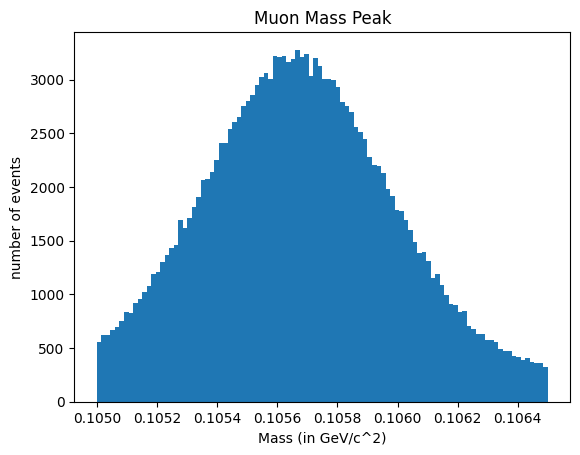

In [ ]:
plt.hist(data['mass'], bins=100, range=[0.105,0.1065], log=False)  # makes the histogram
plt.title("Muon Mass Peak")
plt.xlabel("Mass (in GeV/c^2)")
plt.ylabel("number of events")
plt.grid(False);

## Part Four
The code above may take a few moments to run since it's grabbing a pretty big data set (>400,000 events!?). When it's finished, you'll see a histogram of the invariant mass values you calucalted for muon 1 in each event. This is called a *mass plot*.  
- You'll probably need to adjust the histogram's range and number of bins to see a clear peak. The x-value of that peak occurs at the invariant mass of the particle (in this case, a muon).
- Based on your histogram, what value does the muon's invariant mass seem to be?
- Try replacing the histogram's title and x-axis label to something better.  

## Part Five  
Now that you've analyzed your own huge set of particle collision events, here are some follow-up questions:
- How does the value you calculated compare to the accepted mass of the [muon](https://en.wikipedia.org/wiki/Muon)? Is it very different, if so why might that be?
- Why doesn't energy have x, y, and z components like momentum?
- How does E<sup>2</sup> - p<sup>2</sup> give you a unit of mass<sup>2</sup>?

## More Tools  
The cells below show some more advanced techniques.  

In [ ]:
# run this command to make your plots look like they're from xkcd.com
plt.xkcd();
# then re-execute your code to make a plot and see it xkcd-ified.

In [ ]:
# run this cell to make normal-looking plots again
mpl.rcdefaults()

A professional physicist would usually fit a theoretical curve to the mass plot to identify the particle's invariant mass. For reconstructing more complex particle decays they'd use a [relativistic Breit-Wigner](https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution) curve, but we'll try it here just for practice.  
- First, choose some parameters for the curve based on where the peak is on your histogram and how wide it looks.  
- Then, run the code and keep adjusting the parameters until the curve tightly fits the peak.

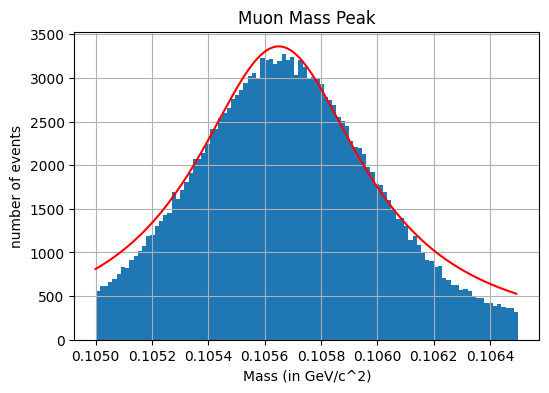

In [ ]:
# Fit "by hand"

# set the Breit-Wigner parameters
xmin = 0.105  # lower bound for your plot
xmax = 0.1065  # upper bound for your plot
particle_mass = .10565 # the x-value of the peak
width = .00073 # width of the peak halfway up; a.k.a. "full width at half max" or FWHM
K = 0.00002  # a constant that affects the height of the curve, you'll need to tinker with this some

# calculate the Breit-Wigner curve
x = np.arange(xmin, xmax, (xmax-xmin)/200) # makes a series of equally spaced x-values
y = K / ((x**2 - particle_mass**2)**2 + (particle_mass*width)**2) # calculates the y-values for the B-W curve

# make the plot
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.hist(data['mass'], bins=100, range=[xmin,xmax], log=False)  # plots the histogram
ax.plot(x, y, color='r')  # plots the curve
plt.title("Muon Mass Peak")
plt.xlabel("Mass (in GeV/c^2)")
plt.ylabel("number of events")
plt.grid(True);

n= [ 553.  620.  617.  665.  694.  755.  835.  823.  916.  955. 1019. 1076.
 1189. 1205. 1298. 1364. 1428. 1456. 1692. 1616. 1715. 1811. 1911. 2067.
 2070. 2143. 2249. 2414. 2412. 2544. 2602. 2653. 2758. 2805. 2857. 2948.
 3020. 3061. 3003. 3224. 3210. 3221. 3161. 3191. 3278. 3206. 3235. 3031.
 3203. 3125. 3004. 3010. 2994. 2933. 2787. 2752. 2694. 2557. 2509. 2449.
 2278. 2206. 2193. 2128. 1979. 1917. 1789. 1775. 1690. 1599. 1487. 1388.
 1393. 1307. 1148. 1191. 1087.  998.  910.  901.  837.  846.  709.  680.
  627.  632.  573.  577.  557.  491.  477.  474.  426.  419.  386.  405.
  373.  358.  363.  319.]
bins= [0.105    0.105015 0.10503  0.105045 0.10506  0.105075 0.10509  0.105105
 0.10512  0.105135 0.10515  0.105165 0.10518  0.105195 0.10521  0.105225
 0.10524  0.105255 0.10527  0.105285 0.1053   0.105315 0.10533  0.105345
 0.10536  0.105375 0.10539  0.105405 0.10542  0.105435 0.10545  0.105465
 0.10548  0.105495 0.10551  0.105525 0.10554  0.105555 0.10557  0.105585
 0.1056   0.1056

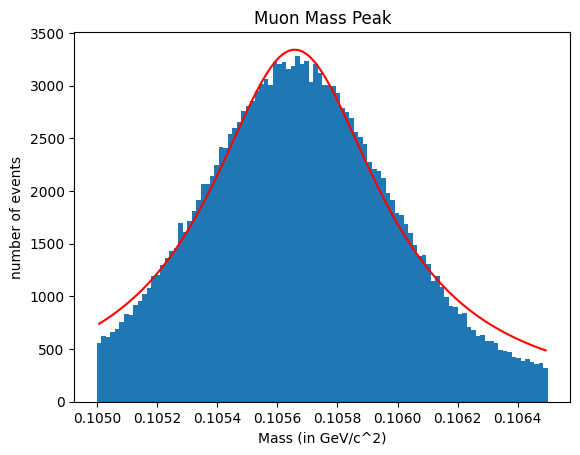

In [ ]:
# Fit using SciPy added by J. Dolen
# Example of how to fit a histogram with a relativistic Breit-Wigner function using scipy

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Note: Normally we do this to plot a histogram:
#    plt.hist(s, bins=100, normed=True, histtype='step',color='blue')
#
# In order to fit the histogram, we need to know the location of each bin and the entries in each bin
#   To do this we can ask that the plot return a tuple of this data (n,bins,patches) when we make the plot:

(n,bins,patches) = plt.hist(data['mass'], bins=100, range=[xmin,xmax], log=False)

#  Reference:
#      ( http://matplotlib.org/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist
#    n = array containing the number of entries in each bin
#    bins = array containing the locations of the bin edges (so the length is nbins +1)

print("n=",n)
print("bins=",bins)
print("patches=",patches)

# To fit we need an array of bin centers. The array returned above contains the bin edge locations. We can calculate the bin center locations as follows:
bin_centers = 0.5*(bins[1:] + bins[:-1])

# define the function used in the fit. In this case we use the relativistic Breit-Wigner function from above
def f(x, particle_mass, width, K):
    return K / ((x**2 - particle_mass**2)**2 + (particle_mass*width)**2)

# Before performing the fit we typically provide the fitting algorithm some ballpark values for the fit parameters.
# Above you were asked to do your best to fit the histogram "by hand". These values will be a good guess for the fit:

guess_particle_mass = .1 # the x-value of the peak
guess_width = .0008 # width of the peak halfway up; a.k.a. "full width at half max" or FWHM
guess_K = 0.000025  # a constant that affects the height of the curve, you'll need to tinker with this some

# Perform the fit using scipy.optimize.curve_fit
#   https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
#   scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=None, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, nan_policy=None, **kwargs)
#   p0 is a list containing the initial guesses for the function parameters
popt, pcov = curve_fit(f, bin_centers, n, p0 = [guess_particle_mass, guess_width, guess_K])

# curve_fit returns popt which is an array of final fit parameters determined by the fit
fit_result_particle_mass = popt[0]
fit_result_width         = popt[1]
fit_result_K             = popt[2]

# Print the fit result parameters to the screen
print("*"*50)
print("fit_result_particle_mass = " , fit_result_particle_mass)
print("fit_result_width         = " , np.fabs(fit_result_width)     )
print("fit_result_K             = " , fit_result_K    )
print("*"*50)

# Plot the fit on top of the histogram.
#  feed the fit function the bin center locations and the fit parameter and plot the values
plt.plot(bin_centers, f(bin_centers,  fit_result_particle_mass, fit_result_width , fit_result_K ), 'r')
plt.title("Muon Mass Peak")
plt.xlabel("Mass (in GeV/c^2)")
plt.ylabel("number of events")
plt.show()

If you finally have a curve that pretty closely fits the peak in your histogram, take a look at the parameters you set. We can use those to determine the particle's mass and lifetime. The invariant mass of the particle is your *particle_mass*. The particle's mean lifetime is h-bar/width.  
- How do the values below compare with the accepted values for mass and lifetime of the muon?  
They probably don't agree very well because we're applying the Breit-Wigner curve to a particle we observed (not valid) instead of one we're trying to reconstruct from analyzing its decay products. If you ever find yourself doing a *mass reconstruction* to discover a short-lived particle by its decay products, this will might be useful.

In [ ]:
print("mass = ", np.round(particle_mass,6), " GeV/c^2")
hbar = 6.582e-25      # in GeV*s
width = np.fabs(fit_result_width)/3e8**2
print("mean lifetime = ", np.format_float_scientific(hbar/(2*width),6), " seconds")

mass =  0.10565  GeV/c^2
mean lifetime =  4.281144e-05  seconds


---  
## Saving Your Work  
This is running on a Google server on a distant planet and deletes what you've done when you close this tab. To save your work for later use or analysis you have a few options:  
- File > "Save a copy in Drive" will save it to you Google Drive in a folder called "Collaboratory". You can run it later from there.  
- File > "Download .ipynb" to save to your computer (and run with Jupyter software later)  
- File > Print to ... um ... print.  
- To save an image of a graph or chart, right-click on it and select Save Image as ...  

## Credits
This notebook was designed by [Quarknet](https://quarknet.org/) Teaching and Learning Fellow [Adam LaMee](https://adamlamee.github.io/) and UCF Physics undergrad Brooke Emison. The handy csv files were created from the CMS Run2011A primary datasets and converted from ROOT format by the masterful [Tom McCauley](https://github.com/tpmccauley). More can be found on the [CERN OpenData](http://opendata.cern.ch/?ln=en) site, like [here](http://opendata.cern.ch/record/545). The 3D vector image can be found on [WikiMedia Commons](https://commons.wikimedia.org/wiki/File:Coord_XYZ.svg). Finally, thanks to the great folks at [Binder](https://mybinder.org/) and [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) for making this notebook interactive without you needing to download it or install [Jupyter](https://jupyter.org/) on your own device. Find more activities and license info at [CODINGinK12.org](http://www.codingink12.org).